In [50]:
#importing important modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
#importing the dataset
insurance=pd.read_csv("insurance.csv")

In [2]:
#Understanding dataset
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
#Preprocessing
print("Total Missing Values:",insurance.isna().sum().sum())
print("Total non Numeric columns:",len(insurance.select_dtypes("object").columns))

Total Missing Values: 0
Total non Numeric columns: 3


In [5]:
{column:list(insurance[column].unique()) for column in insurance.select_dtypes("object").columns}

{'sex': ['female', 'male'],
 'smoker': ['yes', 'no'],
 'region': ['southwest', 'southeast', 'northwest', 'northeast']}

In [6]:
#Statistical Description of the Dataset
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


C:\Users\Dell\Desktop\pandas-setup\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

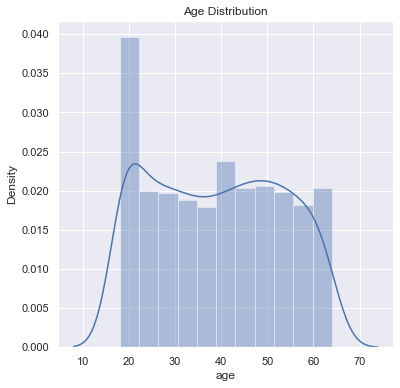

In [7]:
#Distribution of age
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance["age"])
plt.title("Age Distribution")
plt.show


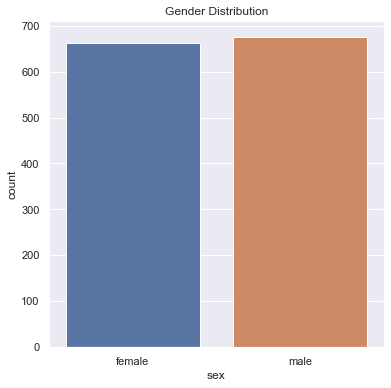

In [8]:
#Gender 
plt.figure(figsize=(6,6))
sns.countplot(x="sex",data=insurance)
plt.title("Gender Distribution")
plt.show()

C:\Users\Dell\Desktop\pandas-setup\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

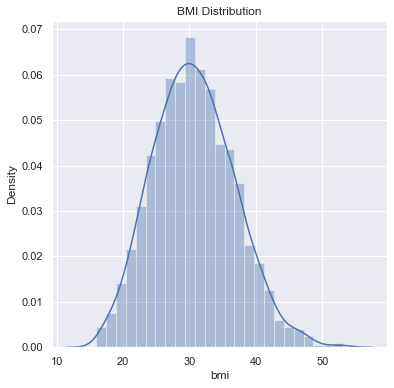

In [9]:
#Distribution of bmi
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance["bmi"])
plt.title("BMI Distribution")
plt.show

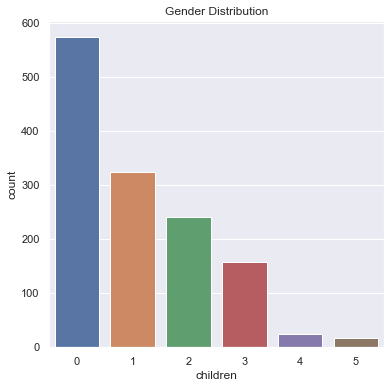

In [10]:
#Gender 
plt.figure(figsize=(6,6))
sns.countplot(x="children",data=insurance)
plt.title("Gender Distribution")
plt.show()

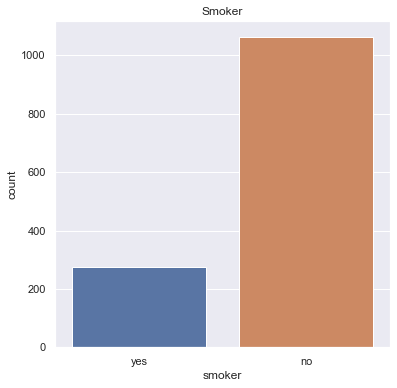

In [11]:
#No of Smoker
plt.figure(figsize=(6,6))
sns.countplot(x="smoker",data=insurance)
plt.title("Smoker")
plt.show()

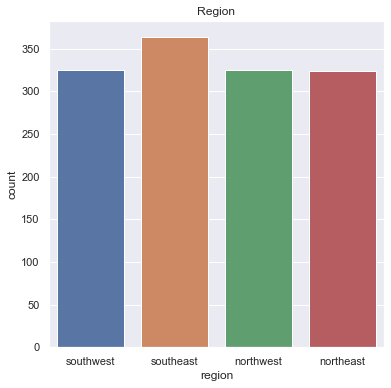

In [12]:
#No of Smoker
plt.figure(figsize=(6,6))
sns.countplot(x="region",data=insurance)
plt.title("Region")
plt.show()

C:\Users\Dell\Desktop\pandas-setup\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

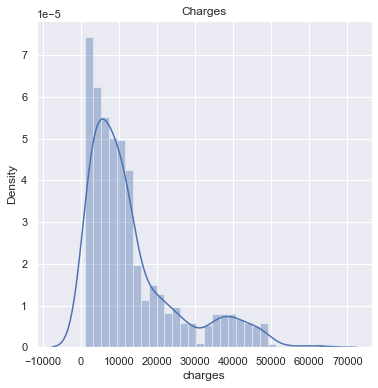

In [13]:
#Distribution of charges
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance["charges"])
plt.title("Charges")
plt.show


In [14]:
#Preprocessingdef binary_encode(df,column,positive_value):

In [15]:
#Step-1:Encode the categorical features
def binary_encode(df,column,positive_value):
    df[column]=df[column].apply(lambda x:1 if x==positive_value else 0)
    return df


In [16]:
#Encode the gender
binary_encode(insurance,"sex","female")
#Encode the smoker
binary_encode(insurance,"smoker","yes")
#Encode the region 
insurance.replace({"region":{"southeast":0,"southwest":1,"northeast":2,"northwest":3}},inplace=True)

In [17]:
#Splitting the feature and the target
Y=insurance["charges"]
X=insurance.drop("charges",axis=1)

In [18]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       1       1
1      18    0  33.770         1       0       0
2      28    0  33.000         3       0       0
3      33    0  22.705         0       0       3
4      32    0  28.880         0       0       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       0       3
1334   18    1  31.920         0       0       2
1335   18    1  36.850         0       0       0
1336   21    1  25.800         0       0       1
1337   61    1  29.070         0       1       3

[1338 rows x 6 columns]


In [19]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [21]:
#Splitting the data into training and testing data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [23]:
#Model Building
#Adding x0=1 to the dataset
X_train_0 = np.c_[np.ones((X_train.shape[0],1)),X_train]
X_test_0 = np.c_[np.ones((X_test.shape[0],1)),X_test]
# Step2: build model
theta = np.matmul(np.linalg.inv( np.matmul(X_train_0.T,X_train_0) ), np.matmul(X_train_0.T,Y_train)) 

In [24]:
# The parameters for linear regression model
parameter = ['theta_'+str(i) for i in range(X_train_0.shape[1])]
columns = ['intersect:x_0=1'] + list(X.columns.values)
parameter_df = pd.DataFrame({'Parameter':parameter,'Columns':columns,'theta':theta})

In [26]:
parameter_df

,Parameter,Columns,theta
0,theta_0,intersect:x_0=1,-12570.432968
1,theta_1,age,251.405122
2,theta_2,sex,26.117160
3,theta_3,bmi,330.646372
4,theta_4,children,580.274383
5,theta_5,smoker,23928.101711
6,theta_6,region,212.222427


In [28]:
# Scikit Learn module
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,Y_train) # Note: x_0 =1 is no need to add, sklearn will take care of it.

#Parameter
sk_theta = [lin_reg.intercept_]+list(lin_reg.coef_)
parameter_df_inbuilt = parameter_df.join(pd.Series(sk_theta, name='Sklearn_theta'))
parameter_df_inbuilt

,Parameter,Columns,theta,Sklearn_theta
0,theta_0,intersect:x_0=1,-12570.432968,-12570.432968
1,theta_1,age,251.405122,251.405122
2,theta_2,sex,26.117160,26.117160
3,theta_3,bmi,330.646372,330.646372
4,theta_4,children,580.274383,580.274383
5,theta_5,smoker,23928.101711,23928.101711
6,theta_6,region,212.222427,212.222427


In [30]:
#Model Evaluation
y_pred_norm =  np.matmul(X_test_0,theta)
# R_square 
sse = np.sum((y_pred_norm - Y_test)**2)
sst = np.sum((Y_test - Y_test.mean())**2)
R_square = 1 - (sse/sst)
print('R square obtain for normal equation method is :',R_square)

R square obtain for normal equation method is : 0.7447273869684077


In [33]:
# sklearn regression module
y_pred_sk = lin_reg.predict(X_test)
# R_square
R_square_sk = lin_reg.score(X_test,Y_test)
print('R square obtain for scikit learn library is :',R_square_sk)

R square obtain for scikit learn library is : 0.7447273869684077


In [38]:
y_pred_norm[:10]

array([ 1520.59242161, 11570.5920178 , 10082.43849883,  2246.21754312,
        7881.28362035, 11081.50227956,  3538.24791808,   698.03224036,
       12223.4851558 ,  9611.93217623])

In [39]:
y_pred_norm[:10]

array([ 1520.59242161, 11570.5920178 , 10082.43849883,  2246.21754312,
        7881.28362035, 11081.50227956,  3538.24791808,   698.03224036,
       12223.4851558 ,  9611.93217623])

C:\Users\Dell\Desktop\pandas-setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Check for Linearity:\n Actual Vs Predicted value')

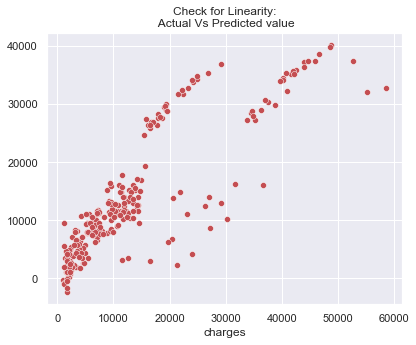

In [41]:
#Model Validation
# Check for Linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(Y_test,y_pred_sk,ax=ax,color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

In [47]:
# Check for Multicollinearity
#Variance Inflation Factor
VIF_inbuilt = 1/(1- R_square_sk)
VIF_inbuilt

3.917380670507889

In [49]:
VIF=1/(1-R_square)
VIF

3.917380670507889

In [51]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

    feature       VIF
0       age  7.952563
1       sex  1.923300
2       bmi  8.712230
3  children  1.808025
4    smoker  1.250748
5    region  2.377057


In [52]:
#------Following inferences can be drawn
#In our model the actual vs predicted plot is curve so linear assumption fails
#VIF lies in the range 1<VIF<5 so moderately correlated